![dsia](https://static1.squarespace.com/static/5c4631190dbda3abea29db4c/t/5c465b0dc74c5024875652f7/1549343891985/?format=1500w)

# Statistics - part 2

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# get matplot to show charts inline
%matplotlib inline

# 1. plot a histogram of a set of observations

experiment with various number of bins

(array([10.,  7.,  2.,  1.,  1.]),
 array([  4. ,  23.2,  42.4,  61.6,  80.8, 100. ]),
 <a list of 5 Patch objects>)

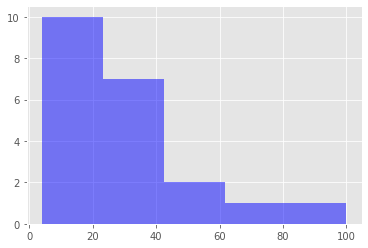

In [17]:
# plot a histogram of a set of observations
# experiment with various number of bins
x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
num_bins = 5
plt.style.use('ggplot')
plt.hist(x, bins = 5, color = 'blue', alpha = 0.5 )

# 2. Calculate statistical information of a set of observations using numpy and stats
```
# Expected Output:
mean of observations = 28.884615384615383
median of observations = 27.0
mode of observations = ModeResult(mode=array([10]), count=array([4]))
percentile of observations = [10.   27.   35.75]
statistical summary of observations = DescribeResult(nobs=26, minmax=(4, 100), mean=28.884615384615383, variance=523.3061538461537, skewness=1.4001632366778733, kurtosis=2.0634808152807826)
```

In [18]:
# calculate statistical information of a set of observations using numpy and stats
observations = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100,10,32,49,10,10]
x = observations
print(np.mean(x))
print(np.median(x))
print(stats.mode(x))
print(np.percentile(x,q=[68,95,99]))
print(stats.describe(x))

28.884615384615383
27.0
ModeResult(mode=array([10]), count=array([4]))
[34.   70.25 94.25]
DescribeResult(nobs=26, minmax=(4, 100), mean=28.884615384615383, variance=523.3061538461537, skewness=1.4001632366778733, kurtosis=2.0634808152807826)


# 3. Plot box chart of obstravations

<function boxplot at 0x000002044F86C400>


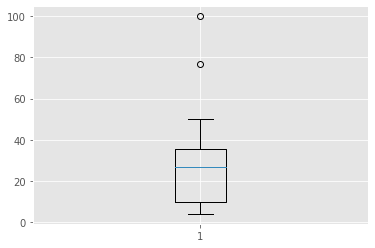

In [19]:
# plot box chart of obstravations
observations = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100,10,32,49,10,10]
plt.boxplot(observations)
print(plt.boxplot)


# 4. Create a Binomial Distribution

Lookup stats.binom.pmf

What does it do?

In [20]:
help(stats.binom.pmf)

Help on method pmf in module scipy.stats._distn_infrastructure:

pmf(k, *args, **kwds) method of scipy.stats._discrete_distns.binom_gen instance
    Probability mass function at k of the given RV.
    
    Parameters
    ----------
    k : array_like
        Quantiles.
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        Location parameter (default=0).
    
    Returns
    -------
    pmf : array_like
        Probability mass function evaluated at k



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[0.00097656 0.00976563 0.04394531 0.1171875  0.20507813 0.24609375
 0.20507813 0.1171875  0.04394531 0.00976563 0.00097656 0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


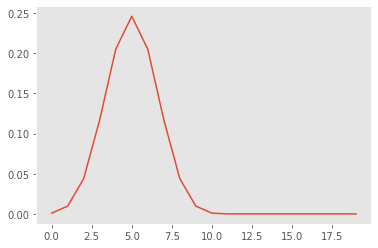

In [21]:
# creating a Binomial Distribution
n = 10
p = 0.5
k = np.arange(0,20)

print(k)

binomial = stats.binom.pmf(k, n, p)

print(binomial)
plt.grid()
plt.plot(binomial);

# 5. Create a scatter plot

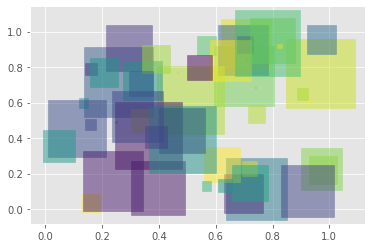

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2.5  # 0 to 15 point radii

plt.scatter(x,y, s=area, c=colors ,alpha =0.5, marker ='s' )

# 6. Calculate and Visualize Correlations

NOTE: Lookup np.corrcoef. What does it do?

Correlation of x and y =  [[1.         0.81543901]
 [0.81543901 1.        ]]


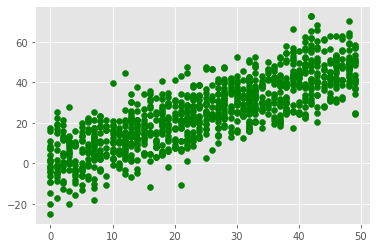

In [35]:
# Calculate and visualise correltions
import matplotlib
np.random.seed(1)

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# Positive Correlation with some noise
y = x + np.random.normal(0, 10, 1000)
print('Correlation of x and y = ',np.corrcoef(x, y))
matplotlib.style.use('ggplot')

plt.scatter(x, y, c = 'green')
plt.show()

In [24]:
# Calculate the coefficient of best fit line or curve
x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100,10,32,49,10,10]
y = [88,12,23,3,6,8,9,12,27,36,34,77,60,35,36,37,18,49,50,100,10,32,49,10,10,22]

print(np.polyfit(x,y,1))

[ 0.11163049 29.5832885 ]


# 7. [BONUS] Plot X, Y and Best Fit Line

**Write a function to calculate best fit.**

![alt text](https://i.imgur.com/B43vOV0.jpg)[1]

[1]: https://www.mathsisfun.com/data/least-squares-regression.html "Least Squares Regression"

best fit line:
y = 0.80 + 0.92x


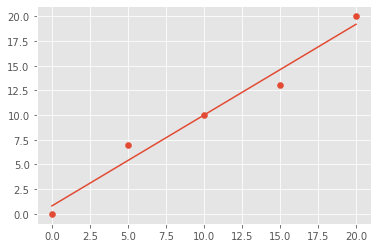

In [25]:
# sample points 
X = [0, 5, 10, 15, 20]
Y = [0, 7, 10, 13, 20]

# solve for a and b
def best_fit(X, Y):
    
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
import matplotlib.pyplot as plt
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)


# 8. plot a histogram of a set of observations - centered

Experiment with various number of bins

        y = x - np.mean(x)

x: [21, 22, 23, 4, 5, 6, 77, 8, 9, 10, 31, 32, 33, 34, 35, 36, 37, 18, 49, 50, 100]
y: [ -9.47619048  -8.47619048  -7.47619048 -26.47619048 -25.47619048
 -24.47619048  46.52380952 -22.47619048 -21.47619048 -20.47619048
   0.52380952   1.52380952   2.52380952   3.52380952   4.52380952
   5.52380952   6.52380952 -12.47619048  18.52380952  19.52380952
  69.52380952]


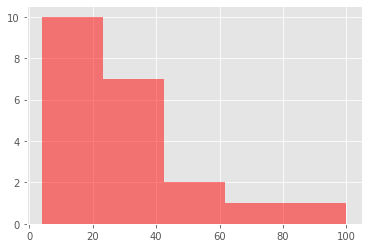

In [26]:
# plot a histogram of a set of observations - centered
# experiment with various number of bins
x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
y = x - np.mean(x)
print('x:',x)
print('y:',y)
num_bins = 5
histtype = "barstacked"
n, bins, patches = plt.hist(x, num_bins, facecolor='red', alpha=0.5)
plt.show()

# 9. plot a histogram of a set of observations - scaled

        y = x / np.std(x)

x: [21, 22, 23, 4, 5, 6, 77, 8, 9, 10, 31, 32, 33, 34, 35, 36, 37, 18, 49, 50, 100]
y: [0.89562766 0.93827659 0.98092553 0.17059574 0.21324468 0.25589362
 3.28396807 0.34119149 0.38384042 0.42648936 1.32211701 1.36476595
 1.40741489 1.45006382 1.49271276 1.53536169 1.57801063 0.76768085
 2.08979786 2.1324468  4.2648936 ]


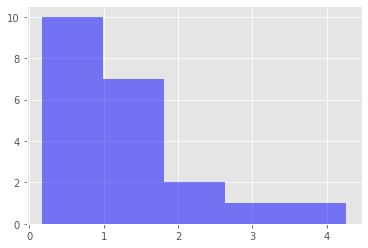

In [27]:
# plot a histogram of a set of observations - scaled
# experiment with various number of bins
x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
y = x / np.std(x)
print('x:',x)
print('y:',y)
num_bins = 5
n, bins, patches = plt.hist(y, num_bins, facecolor='blue', alpha=0.5)
plt.show()

# 10. [BONUS] Create a probplot against normal distribution

Check following methods:

1. stats.loggamma.rvs
2. stats.probplot
3. stats.norm
4. stats.boxcox

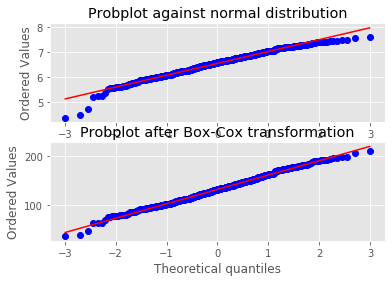

In [31]:
from scipy import stats
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

# 11. [BONUS] Calculate Mean Confidence Interval

Check following methods:

1. scipy.stats.sem
2. scipy.stats.t.ppf

In [32]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

data = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
print(mean_confidence_interval(data))

(30.476190476190474, 19.539561081583383, 41.41281987079756)
